In [8]:
import math
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


# 1.1 Visualization 

In [9]:
def missing_value(df):
	return df.isnull().sum()

#show the confirmed, deaths and recovered rated grouped by country
#showed the top and last 5 info
def group_by(df,groupby,attribute):
	by_country=df.groupby([groupby])[[attribute]].sum()
	print(by_country.sort_values(by=attribute,ascending=False))
    

# For the Location dataset

In [10]:
#read the location_dataset
#read the dataset
df_Location=pd.read_csv('processed_location_Sep20th2020.csv')

# for every attribute print the number of missing values
Location_missing_data=missing_value(df_Location)
print("The number of missing value for every attributes")
print(Location_missing_data)
print()

#check the last updated time
Location_Last_Update = df_Location['Last_Update'].value_counts()
print(Location_Last_Update.head(5))
print()
#the time last updated is almost all the same->useless attribute

#ignore the NaN data in lat and long column
#for attribute Lat and long_
Location_incidents = folium.map.FeatureGroup()
Location_mapInfo = df_Location.dropna(subset=['Lat'])
Location_mapInfo = df_Location.dropna(subset=['Long_'])
for lat,long, in zip(Location_mapInfo.Lat,Location_mapInfo.Long_):
    Location_incidents.add_child(folium.CircleMarker([lat,long],radius=3,color='red',fill=True,fill_color='red',fill_opacity=0.1))
Location_cases_Distribute=folium.Map()
Location_cases_Distribute.add_child(Location_incidents)
Location_cases_Distribute.save('Location_cases_Distribute.html')

#for attributes ['Confirmed','Deaths','Recovered','Active']
list=['Confirmed','Deaths','Recovered','Active']
for attribute in list:
    group_by(df_Location,'Country_Region',attribute)
    print()

#Incidence_Rate attribute
#shows the top 10 result only as the last 10 is NaN
incidentrate=df_Location[['Combined_Key','Incidence_Rate']]
print(incidentrate.sort_values(by=['Incidence_Rate'],ascending=False).head(10))
print()

#Case-Fatality_Ratio
#shows the top 10 result only as the last 10 is NaN
caseFatalityRatio=df_Location[['Combined_Key','Case-Fatality_Ratio']]
print(caseFatalityRatio.sort_values(by=['Case-Fatality_Ratio'],ascending=False).head(10))
print()


The number of missing value for every attributes
Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incidence_Rate          80
Case-Fatality_Ratio     48
dtype: int64

2020-09-20 04:22:56    3951
2020-08-04 02:27:56       2
2020-08-07 22:34:20       1
Name: Last_Update, dtype: int64

                       Confirmed
Country_Region                  
US                       6764970
India                    5308014
Brazil                   4528240
Russia                   1092915
Colombia                  758398
...                          ...
Laos                          23
Saint Kitts and Nevis         17
Holy See                      12
Western Sahara                10
MS Zaandam                     9

[188 rows x 1 columns]

                       Deaths
Country_Regi

# For the Cases Dataset

The number of missing value for every attributes
age                       296874
sex                       293734
province                    6568
country                       24
latitude                       2
longitude                      2
date_confirmation            462
additional_information    522969
source                    209191
outcome                        0
dtype: int64

35-59    18019
15-34    13863
60-79    11996
80+       7279
30        4567
32        4362
29        4318
35        4251
31        4233
28        4143
Name: age, dtype: int64


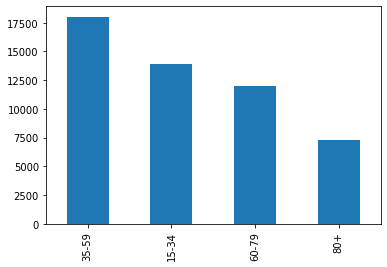


male      145583
female    118047
Name: sex, dtype: int64


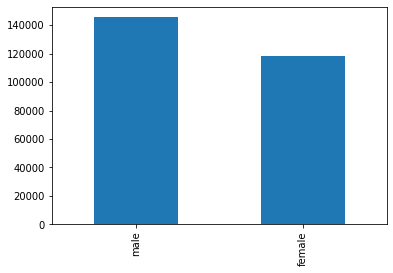


2020-01-06     2
2020-01-12     1
2020-01-15     2
2020-01-17     1
2020-01-18     3
              ..
2020-06-12    95
2020-06-13    85
2020-06-14    16
2020-06-15     7
2020-06-16    14
Name: date_confirmation, Length: 155, dtype: int64


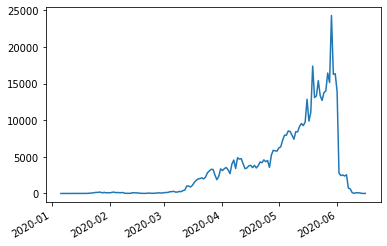


nonhospitalized    250000
hospitalized       203228
recovered           98137
deceased             5999
Name: outcome, dtype: int64


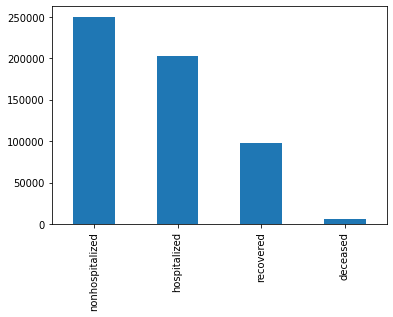

In [11]:
df_Cases=pd.read_csv('processed_individual_cases_Sep20th2020.csv')

# for every attribute print the number of missing values
Cases_missing_data=missing_value(df_Cases)
print("The number of missing value for every attributes")
print(Cases_missing_data)
print()


# age attribute
#just shows the trend of the range of age
ageInfo = df_Cases['age'].value_counts()
print(ageInfo.head(10))
ageInfo.head(4).plot.bar()
plt.show()
print()

# sex attribute
sexInfo = df_Cases['sex'].value_counts()
print(sexInfo)
sexInfo.plot.bar()
plt.show()
print()

#ignore the additional_information and source attribute

#for date_confirmation attribute
dfdata = pd.to_datetime(df_Cases.date_confirmation,format='%d.%m.%Y',errors='coerce')
date_confirmation_Info = dfdata.value_counts().sort_index()
print(date_confirmation_Info)
date_confirmation_Info.plot(kind='line')
plt.show()
print()

#for outcome attribute
outcomeInfo = df_Cases['outcome'].value_counts()
print(outcomeInfo)
outcomeInfo.plot.bar()
plt.show()



In [ ]:
#*****Long Computation*****
#ignore attribute province and country 
#used lat and long to show province and country details
#ignore the NaN data in lat and long column
#for attribute lat and long_
incidents = folium.map.FeatureGroup()
mapInfo = df_Cases.dropna(subset=['latitude'])
mapInfo = df_Cases.dropna(subset=['longitude'])
for lat,long, in zip(mapInfo.latitude,mapInfo.longitude):
    incidents.add_child(folium.CircleMarker([lat,long],radius=3,color='red',fill=True,fill_color='red',fill_opacity=0.1))
Individual_cases_Distribute=folium.Map()
Individual_cases_Distribute.add_child(incidents)
Individual_cases_Distribute.save('individual_cases_Distribute.html')
print()


# 1.3 Dealing with outliers

# 1.4 Transformation

In [18]:

df_Location = pd.read_csv("processed_location_Sep20th2020.csv")

df2 = df_Location[df_Location['Country_Region'] == 'US'].groupby('Province_State').agg(
    Lat=('Lat', np.mean),
    Long_=('Long_', np.mean),
    Confirmed=('Confirmed', sum),
    Deaths=('Deaths', sum),
    Recovered=('Recovered', sum),
    Active=('Active', sum),
    Incidence_Rate=('Incidence_Rate', np.mean),
    CaseFatality_Ratio=('Case-Fatality_Ratio', np.mean)
).reset_index()

df2 = df2[df2.Province_State != 'Recovered']
df2 = df2[df2.Province_State != 'Grand Princess']
df2 = df2[df2.Province_State != 'Diamond Princess']
print(df2)
df2.to_csv('1.4.csv',index=False)

              Province_State        Lat       Long_  Confirmed  Deaths  \
0                    Alabama  32.884280  -86.710122     144164    2437   
1                     Alaska  60.411506 -148.687693       6729      45   
2                    Arizona  33.675904 -111.463232     212942    5451   
3                   Arkansas  34.911889  -92.433978      75160    1181   
4                 California  37.843962 -120.728594     783313   15018   
5                   Colorado  38.935474 -105.486240      64336    2013   
6                Connecticut  41.613680  -72.656830      55527    4492   
7                   Delaware  39.109277  -75.533237      19449     621   
9       District of Columbia  38.904178  -77.016560      14902     619   
10                   Florida  28.940755  -82.700744     681233   13287   
11                   Georgia  32.808532  -83.577430     305021    6599   
13                      Guam  13.444300  144.793700       2074      31   
14                    Hawaii  20.99064

# 1.5 Joining the cases and location dataset 

In [19]:
df2.rename(columns={'CaseFatality_Ratio':'Case-Fatality_Ratio'},inplace=True)

df2.insert(1,"Country_Region","US")
df2.insert(9,"Combined_Key","")
#df2.to_csv('1.4.csv',index=False)

df_Location = df_Location[df_Location.Country_Region != 'US']
df_Location_new=df_Location.append(df2)
#df_Location_new.to_csv('df_Location_new.csv',index=False)
df_Cases=pd.read_csv('processed_individual_cases_Sep20th2020.csv')

df_Location_new.rename(columns={'Province_State':'province', 'Country_Region':'country'},inplace = True)
df_Cases['country'] = df_Cases['country'].replace(['United States'],'US')
df_Combined = pd.merge(df_Cases,df_Location_new)  
df_Combined.drop(columns=['additional_information','Lat', 'Long_','source','Last_Update','Combined_Key'],inplace=True)

print(df_Combined)
df_Combined.to_csv('Combined.csv',index=False)

          age     sex province   country   latitude  longitude  \
0         NaN     NaN  Gujarat     India  23.027760   72.60027   
1         NaN     NaN  Gujarat     India  23.027760   72.60027   
2         NaN     NaN  Gujarat     India  23.027760   72.60027   
3         NaN     NaN  Gujarat     India  21.185780   72.83679   
4         NaN    male  Gujarat     India  23.027760   72.60027   
...       ...     ...      ...       ...        ...        ...   
461930  50-59  female   Nagano     Japan  36.135960  138.04630   
461931  50-59  female   Nagano     Japan  36.135960  138.04630   
461932      0    male   Arauca  Colombia   7.086930  -70.75869   
461933     65  female   Arauca  Colombia   6.463920  -71.72770   
461934    NaN     NaN  Roraima    Brazil   3.012199  -60.74727   

       date_confirmation          outcome  Confirmed  Deaths  Recovered  \
0             15.04.2020     hospitalized     120336    3286     100974   
1             22.05.2020     hospitalized     120336    3